In [3]:
import torch
import torchaudio
import librosa
import matplotlib.pyplot as plt
import torchaudio.transforms as T

In [31]:
waveform, sample_rate = torchaudio.load("/home/karolwojtulewicz/code/actionformer_release/data/thumos/i3d_features/video_test_0000001.wav", normalize=True)
transform = T.Spectrogram(return_complex=True)
spectrogram = transform(waveform)

/home/karolwojtulewicz/miniconda3/envs/aformer/lib/python3.10/site-packages/torchaudio/transforms/_transforms.py:92: UserWarning: `return_complex` argument is now deprecated and is not effective.`torchaudio.transforms.Spectrogram(power=None)` always returns a tensor with complex dtype. Please remove the argument in the function call.
  warnings.warn(


In [21]:
def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

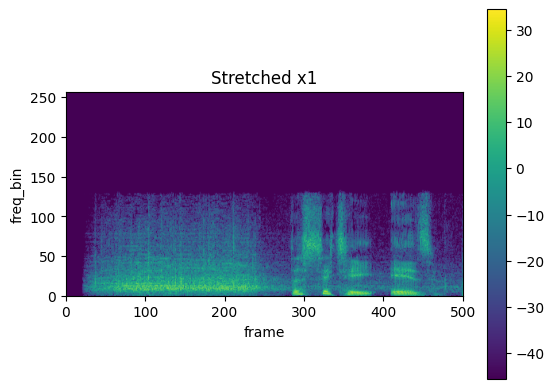

torch.Size([2, 257, 14269])


In [32]:
rate = 1
plot_spectrogram(torch.abs(spectrogram[1]), title=f"Stretched x{rate}", aspect="equal", xmax=500)
print(spectrogram.shape)